# Clustering Jerárquico

In [1]:
# Se importan las librerías necesarias 
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import scipy.spatial.distance as sc

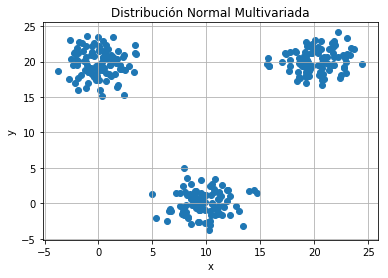

In [2]:
#%% Generar los datos para clasificar 

# np.random.seed hace a los números aleatorios predecibles
np.random.seed(1000)

# Se generan 3 grupos con 100 puntos aleatorios cada uno
# The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. 
## Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.
# La covarianza debe ser diagonal 
# En a se generan 100 puntos aleatorios con media (10,0),y varianza (3,3)
a=np.random.multivariate_normal([10,0],[[3,0],[0,3]],size=[100])
b=np.random.multivariate_normal([0,20],[[3,0],[0,3]],size=[100])
c=np.random.multivariate_normal([20,20],[[3,0],[0,3]],size=[100])
# Se concatenan las matrices
## Con axis=0 se concatenan hacia abajo. El resultado es una matriz de 300*2
X=np.concatenate((a,b,c),axis=0) 
X
# Se grafican las 3 distribuciones multivariadas normales
plt.scatter(X[:,0],X[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Distribución Normal Multivariada")
plt.grid()
plt.show()

## Dendrograma

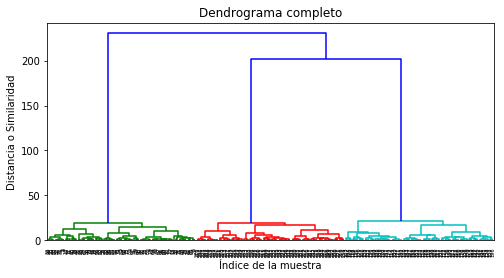

In [3]:
#%% Aplicar clustering jerárquico a los datos X
# Los índices de similitud se calculan con distancia euclidiana y el método es ward
# Los métodos sirven para computar la distancia entre dos clústers
# El método "ward" usa el algoritmo de minimización de la varianza 

# El método "complete" es el visto en clase, se define de la siguiente forma:
## At each step, the two clusters separated by the shortest distance are combined. The definition of 'shortest distance' is what differentiates between the different agglomerative clustering methods. In complete-linkage clustering, the link between two clusters contains all element pairs, and the distance between clusters equals the distance between those two elements (one in each cluster) that are farthest away from each other. The shortest of these links that remains at any step causes the fusion of the two clusters whose elements are involved. 

Z=hierarchy.linkage(X,metric="euclidean",method="ward")

# Se grafica el dendrograma
plt.figure(figsize=(8,4))
plt.title("Dendrograma completo")
plt.xlabel("Índice de la muestra")
plt.ylabel("Distancia o Similaridad")
dn=hierarchy.dendrogram(Z)
plt.show()

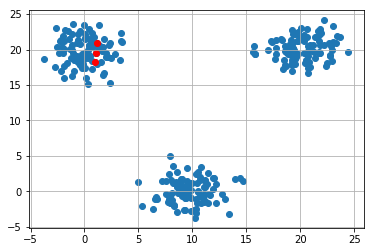

In [4]:
#% Mostrar un conjunto elegido arbitrariamente formado en el cluster
idx=[161,132,153]
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idx,0],X[idx,1],c="r")
plt.grid()
plt.show()

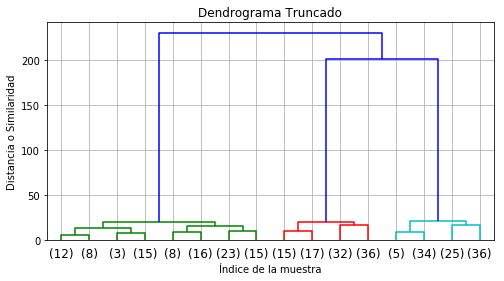

In [5]:
#%% Modificar el aspecto del dendrograma
# El dendrograma muestra hasta los 3 clusters
# Se observa que de los 3 clusters a los 2 clusters el índice de similaridad aumenta demasiado, esto es un indicador de que el agrupamiento óptimo son 3 clusters; que es donde los elementos de los conjuntos presentan mayor similaridad antes de volverse menos parecidos (cuando se hacen dos clusters)
plt.figure(figsize=(8,4))
plt.title("Dendrograma Truncado")
plt.xlabel("Índice de la muestra")
plt.ylabel("Distancia o Similaridad")
plt.grid()
dn=hierarchy.dendrogram(Z,truncate_mode="level",p=3)
plt.show()

## Z

In [6]:
import pandas as pd
z_dataframe=pd.DataFrame(Z)
z_dataframe

,0,1,2,3
0,4.0,92.0,0.025438,2.0
1,229.0,271.0,0.032850,2.0
2,111.0,187.0,0.045884,2.0
3,70.0,91.0,0.051380,2.0
4,132.0,169.0,0.052230,2.0
5,117.0,162.0,0.052829,2.0
6,44.0,79.0,0.057752,2.0
7,189.0,195.0,0.063791,2.0
8,5.0,89.0,0.071382,2.0
9,33.0,63.0,0.080068,2.0


+ array([ 52.     ,  53.     ,   0.04151,   2.     ])

We can see that each row of the resulting array has the format [idx1, idx2, dist, sample_count].

In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 52 and 53, as they only had a distance of 0.04151. This created a cluster with a total of 2 samples.

## Criterio del codo

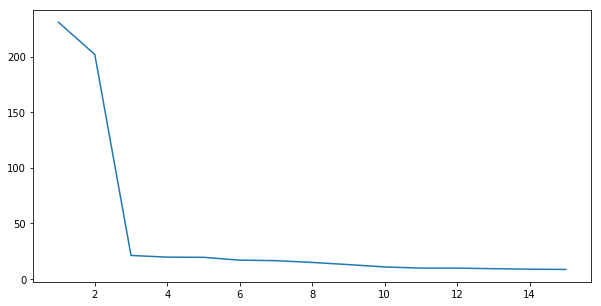

In [7]:
# Se crea un vector con los últimos 15 valores de la columna 3 de Z, que nos dice la distancia entre los elementos del clúster
last=Z[-15:,2]
# Se revierte la lista anterior
last_rev=last[::-1]
idxs=np.arange(1,len(last_rev)+1)
plt.figure(figsize=(10,5))
plt.plot(idxs,last_rev)
plt.show()

Se ven las distancias de los últimos $15$ clústers.

## Criterio del gradiente

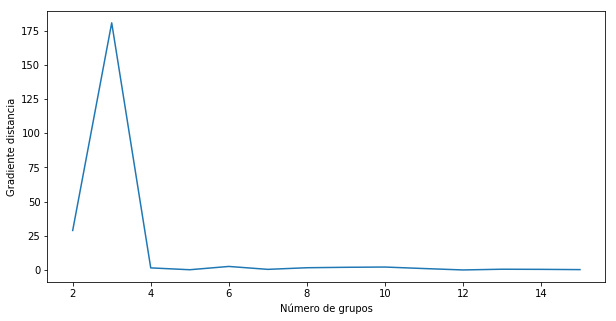

In [8]:
# Se toma la derivada del vector que contiene las distancias de los últimos 15 clústers
# El último elemento del vector no tendrá derivada. Dicho elemento es un único clúster.
gradiente=np.diff(last)
# Se revierte el vector anterior, esto para que dé en orden ascendente la diferencia de las distancias entre clústers (del 1 al 15)
grad_rev=gradiente[::-1]

# Se grafica el criterio del gradiente
plt.figure(figsize=(10,5))
# Se grafica a partir de 2 clústers. la interpretación del punto (2,28) es la siguiente: el cambio en la distancia cuando se pasa de 2 clústers a 1 único clúster.
plt.plot(idxs[1:],grad_rev)
plt.xlabel("Número de grupos")
plt.ylabel("Gradiente distancia")
plt.show()

+ Es necesario recordar que en este algoritmo por cada iteración se tienen menos clústers. 

In [9]:
# El penúltimo elemento del vector gradiente contiene la mayor diferencia, es decir, la siguiente derivada: 
# Distancia entre 2 clústers-Distancia entre 3 clústers
# Dicho punto es el máximo global, en otras palabras: cuando se cambia de 3 clústers a 2 clústers, la distancia (índice de similitud) aumenta más que en cualquier otro cambio de agrupación
# Por lo tanto 3 clústers son el número de agrupamientos óptimos
gradiente

array([2.47303186e-01, 4.36474801e-01, 5.27107477e-01, 1.39086421e-03,
       1.03310529e+00, 2.12410983e+00, 1.93902130e+00, 1.61495091e+00,
       4.28334785e-01, 2.56519054e+00, 1.51828185e-01, 1.50863114e+00,
       1.80783992e+02, 2.88882874e+01])

## Clústers 

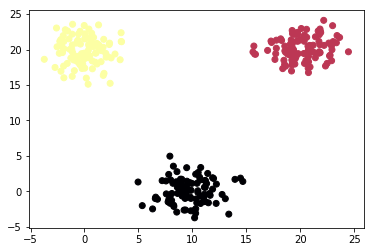

In [10]:
# Selección de los grupos por número de grupos 
gruposmax=3
grupos=hierarchy.fcluster(Z,gruposmax,criterion="maxclust")
plt.figure()
plt.scatter(X[:,0],X[:,1],c=grupos,cmap=plt.cm.inferno)
plt.show()

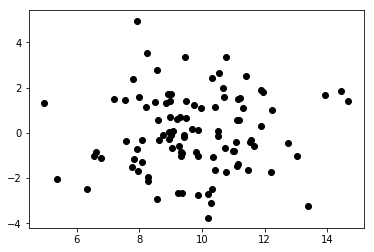

In [11]:
# Filtrar o tomar los datos que pertenezcan a un grupo
idx=grupos==1
x_data_1=X[idx,:]
plt.figure()
plt.scatter(x_data_1[:,0],x_data_1[:,1],c="k")
plt.show()

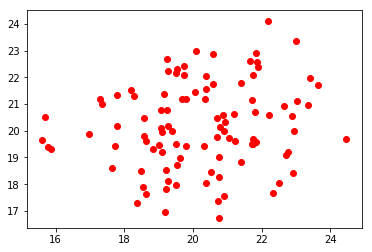

In [12]:
idx_2=grupos==2
x_data_2=X[idx_2,:]
plt.figure()
plt.scatter(x_data_2[:,0],x_data_2[:,1],c="r")
plt.show()

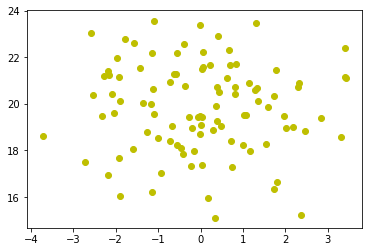

In [13]:
idx_3=grupos==3
x_data_3=X[idx_3,:]
plt.figure()
plt.scatter(x_data_3[:,0],x_data_3[:,1],c="y")
plt.show()

## Clustering del 3er clúster 

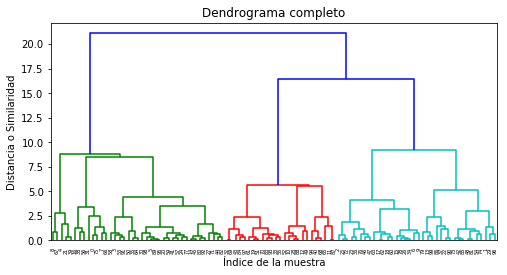

In [14]:
Z=hierarchy.linkage(x_data_3,metric="euclidean",method="ward")
plt.figure(figsize=(8,4))
plt.title("Dendrograma completo")
plt.xlabel("Índice de la muestra")
plt.ylabel("Distancia o Similaridad")
dn=hierarchy.dendrogram(Z)
plt.show()

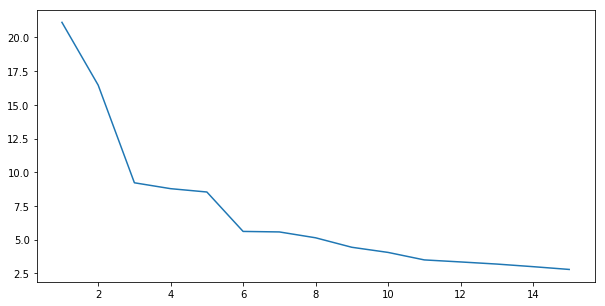

In [15]:
last=Z[-15:,2]
last_rev=last[::-1]
idxs=np.arange(1,len(last_rev)+1)
plt.figure(figsize=(10,5))
plt.plot(idxs,last_rev)
plt.show()

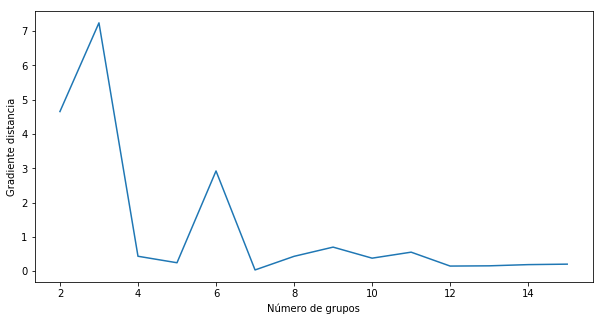

In [16]:
gradiente=np.diff(last)
grad_rev=gradiente[::-1]
plt.figure(figsize=(10,5))
plt.plot(idxs[1:],grad_rev)
plt.xlabel("Número de grupos")
plt.ylabel("Gradiente distancia")
plt.show()

El número óptimo de clústers es de 3.

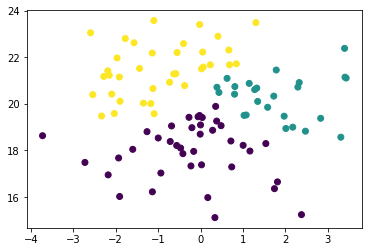

In [17]:
gruposmax=3
grupos=hierarchy.fcluster(Z,gruposmax,criterion="maxclust")
plt.figure()
plt.scatter(x_data_3[:,0],x_data_3[:,1],c=grupos,cmap=plt.cm.viridis)
plt.show()